In [138]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import datetime
import math

In [139]:
df = pd.read_csv('bike.csv')

In [140]:
print(len(df))

2092573


In [141]:
df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,527,2019-10-01 00:00:05.6180,2019-10-01 00:08:52.9430,3746,6 Ave & Broome St,40.724308,-74.004730,223,W 13 St & 7 Ave,40.737815,-73.999947,41750,Subscriber,1993,1
1,174,2019-10-01 00:00:15.8750,2019-10-01 00:03:10.1680,3301,Columbus Ave & W 95 St,40.791956,-73.968087,3283,W 89 St & Columbus Ave,40.788221,-73.970416,18264,Subscriber,1992,1
2,759,2019-10-01 00:00:19.8240,2019-10-01 00:12:59.7070,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,174,E 25 St & 1 Ave,40.738177,-73.977387,25525,Subscriber,1995,1
3,615,2019-10-01 00:00:21.0680,2019-10-01 00:10:36.6790,254,W 11 St & 6 Ave,40.735324,-73.998004,477,W 41 St & 8 Ave,40.756405,-73.990026,30186,Subscriber,1992,1
4,761,2019-10-01 00:00:26.3800,2019-10-01 00:13:08.3130,161,LaGuardia Pl & W 3 St,40.729170,-73.998102,174,E 25 St & 1 Ave,40.738177,-73.977387,25597,Subscriber,1992,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092568,729,2019-10-31 23:59:12.1900,2019-11-01 00:11:21.4860,237,E 11 St & 2 Ave,40.730473,-73.986724,311,Norfolk St & Broome St,40.717227,-73.988021,25725,Subscriber,1995,1
2092569,645,2019-10-31 23:59:17.0470,2019-11-01 00:10:02.9450,3259,9 Ave & W 28 St,40.749370,-73.999234,461,E 20 St & 2 Ave,40.735877,-73.982050,39583,Customer,1969,0
2092570,257,2019-10-31 23:59:22.5140,2019-11-01 00:03:40.2600,3798,W 40 St & 5 Ave,40.752269,-73.982079,505,6 Ave & W 33 St,40.749013,-73.988484,21240,Subscriber,1985,1
2092571,466,2019-10-31 23:59:23.1710,2019-11-01 00:07:09.2050,328,Watts St & Greenwich St,40.724055,-74.009660,361,Allen St & Hester St,40.716059,-73.991908,34916,Subscriber,1989,0


In [142]:
ndf = df[['tripduration', 'starttime', 'stoptime',
       'start station name', 'end station name',
      'bikeid', 'usertype','birth year', 'gender']]

In [143]:
df = ndf.rename(columns={"tripduration" : "Trip_Duration", "starttime" : "Start_Time", "stoptime" : "Stop_Time", "start station name": "Start_Station_Name","end station name": "End_Station_Name", "bikeid":"Bike_Id", "usertype":"User_Type", "birth year":"Birth_Year", "gender":"Gender"})

In [144]:
df.dropna()

,Trip_Duration,Start_Time,Stop_Time,Start_Station_Name,End_Station_Name,Bike_Id,User_Type,Birth_Year,Gender
0,527,2019-10-01 00:00:05.6180,2019-10-01 00:08:52.9430,6 Ave & Broome St,W 13 St & 7 Ave,41750,Subscriber,1993,1
1,174,2019-10-01 00:00:15.8750,2019-10-01 00:03:10.1680,Columbus Ave & W 95 St,W 89 St & Columbus Ave,18264,Subscriber,1992,1
2,759,2019-10-01 00:00:19.8240,2019-10-01 00:12:59.7070,LaGuardia Pl & W 3 St,E 25 St & 1 Ave,25525,Subscriber,1995,1
3,615,2019-10-01 00:00:21.0680,2019-10-01 00:10:36.6790,W 11 St & 6 Ave,W 41 St & 8 Ave,30186,Subscriber,1992,1
4,761,2019-10-01 00:00:26.3800,2019-10-01 00:13:08.3130,LaGuardia Pl & W 3 St,E 25 St & 1 Ave,25597,Subscriber,1992,1
...,...,...,...,...,...,...,...,...,...
2092568,729,2019-10-31 23:59:12.1900,2019-11-01 00:11:21.4860,E 11 St & 2 Ave,Norfolk St & Broome St,25725,Subscriber,1995,1
2092569,645,2019-10-31 23:59:17.0470,2019-11-01 00:10:02.9450,9 Ave & W 28 St,E 20 St & 2 Ave,39583,Customer,1969,0
2092570,257,2019-10-31 23:59:22.5140,2019-11-01 00:03:40.2600,W 40 St & 5 Ave,6 Ave & W 33 St,21240,Subscriber,1985,1
2092571,466,2019-10-31 23:59:23.1710,2019-11-01 00:07:09.2050,Watts St & Greenwich St,Allen St & Hester St,34916,Subscriber,1989,0


In [145]:
df

,Trip_Duration,Start_Time,Stop_Time,Start_Station_Name,End_Station_Name,Bike_Id,User_Type,Birth_Year,Gender
0,527,2019-10-01 00:00:05.6180,2019-10-01 00:08:52.9430,6 Ave & Broome St,W 13 St & 7 Ave,41750,Subscriber,1993,1
1,174,2019-10-01 00:00:15.8750,2019-10-01 00:03:10.1680,Columbus Ave & W 95 St,W 89 St & Columbus Ave,18264,Subscriber,1992,1
2,759,2019-10-01 00:00:19.8240,2019-10-01 00:12:59.7070,LaGuardia Pl & W 3 St,E 25 St & 1 Ave,25525,Subscriber,1995,1
3,615,2019-10-01 00:00:21.0680,2019-10-01 00:10:36.6790,W 11 St & 6 Ave,W 41 St & 8 Ave,30186,Subscriber,1992,1
4,761,2019-10-01 00:00:26.3800,2019-10-01 00:13:08.3130,LaGuardia Pl & W 3 St,E 25 St & 1 Ave,25597,Subscriber,1992,1
...,...,...,...,...,...,...,...,...,...
2092568,729,2019-10-31 23:59:12.1900,2019-11-01 00:11:21.4860,E 11 St & 2 Ave,Norfolk St & Broome St,25725,Subscriber,1995,1
2092569,645,2019-10-31 23:59:17.0470,2019-11-01 00:10:02.9450,9 Ave & W 28 St,E 20 St & 2 Ave,39583,Customer,1969,0
2092570,257,2019-10-31 23:59:22.5140,2019-11-01 00:03:40.2600,W 40 St & 5 Ave,6 Ave & W 33 St,21240,Subscriber,1985,1
2092571,466,2019-10-31 23:59:23.1710,2019-11-01 00:07:09.2050,Watts St & Greenwich St,Allen St & Hester St,34916,Subscriber,1989,0


In [146]:
df["Trip_Duration_mins"] = round(df["Trip_Duration"]/60, ndigits = 0)

In [147]:
df

,Trip_Duration,Start_Time,Stop_Time,Start_Station_Name,End_Station_Name,Bike_Id,User_Type,Birth_Year,Gender,Trip_Duration_mins
0,527,2019-10-01 00:00:05.6180,2019-10-01 00:08:52.9430,6 Ave & Broome St,W 13 St & 7 Ave,41750,Subscriber,1993,1,9.0
1,174,2019-10-01 00:00:15.8750,2019-10-01 00:03:10.1680,Columbus Ave & W 95 St,W 89 St & Columbus Ave,18264,Subscriber,1992,1,3.0
2,759,2019-10-01 00:00:19.8240,2019-10-01 00:12:59.7070,LaGuardia Pl & W 3 St,E 25 St & 1 Ave,25525,Subscriber,1995,1,13.0
3,615,2019-10-01 00:00:21.0680,2019-10-01 00:10:36.6790,W 11 St & 6 Ave,W 41 St & 8 Ave,30186,Subscriber,1992,1,10.0
4,761,2019-10-01 00:00:26.3800,2019-10-01 00:13:08.3130,LaGuardia Pl & W 3 St,E 25 St & 1 Ave,25597,Subscriber,1992,1,13.0
...,...,...,...,...,...,...,...,...,...,...
2092568,729,2019-10-31 23:59:12.1900,2019-11-01 00:11:21.4860,E 11 St & 2 Ave,Norfolk St & Broome St,25725,Subscriber,1995,1,12.0
2092569,645,2019-10-31 23:59:17.0470,2019-11-01 00:10:02.9450,9 Ave & W 28 St,E 20 St & 2 Ave,39583,Customer,1969,0,11.0
2092570,257,2019-10-31 23:59:22.5140,2019-11-01 00:03:40.2600,W 40 St & 5 Ave,6 Ave & W 33 St,21240,Subscriber,1985,1,4.0
2092571,466,2019-10-31 23:59:23.1710,2019-11-01 00:07:09.2050,Watts St & Greenwich St,Allen St & Hester St,34916,Subscriber,1989,0,8.0


In [148]:
df = df.rename(columns={"Trip_Duration_mins":"Trip_Duration_Mins"})

In [149]:
df['Trip_Duration_Mins'] = df['Trip_Duration_Mins'].round().astype('int32')

In [150]:
df.loc[:,('Birth_Year')] = df['Birth_Year'].astype(int)

In [151]:
df

,Trip_Duration,Start_Time,Stop_Time,Start_Station_Name,End_Station_Name,Bike_Id,User_Type,Birth_Year,Gender,Trip_Duration_Mins
0,527,2019-10-01 00:00:05.6180,2019-10-01 00:08:52.9430,6 Ave & Broome St,W 13 St & 7 Ave,41750,Subscriber,1993,1,9
1,174,2019-10-01 00:00:15.8750,2019-10-01 00:03:10.1680,Columbus Ave & W 95 St,W 89 St & Columbus Ave,18264,Subscriber,1992,1,3
2,759,2019-10-01 00:00:19.8240,2019-10-01 00:12:59.7070,LaGuardia Pl & W 3 St,E 25 St & 1 Ave,25525,Subscriber,1995,1,13
3,615,2019-10-01 00:00:21.0680,2019-10-01 00:10:36.6790,W 11 St & 6 Ave,W 41 St & 8 Ave,30186,Subscriber,1992,1,10
4,761,2019-10-01 00:00:26.3800,2019-10-01 00:13:08.3130,LaGuardia Pl & W 3 St,E 25 St & 1 Ave,25597,Subscriber,1992,1,13
...,...,...,...,...,...,...,...,...,...,...
2092568,729,2019-10-31 23:59:12.1900,2019-11-01 00:11:21.4860,E 11 St & 2 Ave,Norfolk St & Broome St,25725,Subscriber,1995,1,12
2092569,645,2019-10-31 23:59:17.0470,2019-11-01 00:10:02.9450,9 Ave & W 28 St,E 20 St & 2 Ave,39583,Customer,1969,0,11
2092570,257,2019-10-31 23:59:22.5140,2019-11-01 00:03:40.2600,W 40 St & 5 Ave,6 Ave & W 33 St,21240,Subscriber,1985,1,4
2092571,466,2019-10-31 23:59:23.1710,2019-11-01 00:07:09.2050,Watts St & Greenwich St,Allen St & Hester St,34916,Subscriber,1989,0,8


In [152]:
df.describe()

,Trip_Duration,Bike_Id,Birth_Year,Gender,Trip_Duration_Mins
count,2.092573e+06,2.092573e+06,2.092573e+06,2.092573e+06,2.092573e+06
mean,9.145827e+02,3.168730e+04,1.980680e+03,1.171635e+00,1.524263e+01
std,7.479508e+03,8.305669e+03,1.219031e+01,5.376945e-01,1.246589e+02
min,6.100000e+01,1.452900e+04,1.874000e+03,0.000000e+00,1.000000e+00
25%,3.700000e+02,2.641900e+04,1.970000e+03,1.000000e+00,6.000000e+00
50%,6.170000e+02,3.278400e+04,1.983000e+03,1.000000e+00,1.000000e+01
75%,1.054000e+03,3.952500e+04,1.991000e+03,1.000000e+00,1.800000e+01
max,2.946638e+06,4.206800e+04,2.003000e+03,2.000000e+00,4.911100e+04


In [153]:
df.isnull().sum()

Trip_Duration         0
Start_Time            0
Stop_Time             0
Start_Station_Name    0
End_Station_Name      0
Bike_Id               0
User_Type             0
Birth_Year            0
Gender                0
Trip_Duration_Mins    0
dtype: int64

In [154]:
df.drop(["Start_Time","Stop_Time","Start_Station_Name","End_Station_Name","Bike_Id"],axis=1,inplace=True)

In [155]:
df.head()

,Trip_Duration,User_Type,Birth_Year,Gender,Trip_Duration_Mins
0,527,Subscriber,1993,1,9
1,174,Subscriber,1992,1,3
2,759,Subscriber,1995,1,13
3,615,Subscriber,1992,1,10
4,761,Subscriber,1992,1,13


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2092573 entries, 0 to 2092572
Data columns (total 5 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   Trip_Duration       int64 
 1   User_Type           object
 2   Birth_Year          int32 
 3   Gender              int64 
 4   Trip_Duration_Mins  int32 
dtypes: int32(2), int64(2), object(1)
memory usage: 63.9+ MB


In [157]:
User_Type = pd.get_dummies(df["User_Type"],drop_first=True)

In [158]:
User_Type

,Subscriber
0,1
1,1
2,1
3,1
4,1
...,...
2092568,1
2092569,0
2092570,1
2092571,1


In [159]:
df.User_Type.value_counts()

Subscriber    1796820
Customer       295753
Name: User_Type, dtype: int64

In [160]:
df.dtypes

Trip_Duration          int64
User_Type             object
Birth_Year             int32
Gender                 int64
Trip_Duration_Mins     int32
dtype: object

In [161]:
df.drop(["User_Type"],axis = 1, inplace=True)

In [162]:
data = pd.concat([df, User_Type], axis=1)

In [163]:
data

,Trip_Duration,Birth_Year,Gender,Trip_Duration_Mins,Subscriber
0,527,1993,1,9,1
1,174,1992,1,3,1
2,759,1995,1,13,1
3,615,1992,1,10,1
4,761,1992,1,13,1
...,...,...,...,...,...
2092568,729,1995,1,12,1
2092569,645,1969,0,11,0
2092570,257,1985,1,4,1
2092571,466,1989,0,8,1


In [164]:
data.dtypes

Trip_Duration         int64
Birth_Year            int32
Gender                int64
Trip_Duration_Mins    int32
Subscriber            uint8
dtype: object

In [165]:
X = data.drop("Subscriber",axis=1)
y = data["Subscriber"]

In [166]:
from sklearn.model_selection import train_test_split

In [167]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,
                                                random_state=100)

In [168]:
from sklearn.linear_model import LogisticRegression

In [169]:
lg_model = LogisticRegression()

In [170]:
lg_model.fit(X_train,y_train)

LogisticRegression()

In [171]:
training_score = lg_model.score(X_train,y_train)
testing_score = lg_model.score(X_test,y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.8848294507110548
Testing Score: 0.8848959368739774


In [172]:
from sklearn.metrics import confusion_matrix

In [173]:
prediction = lg_model.predict(X_test)

In [174]:
confusion_matrix(y_test,prediction)

array([[ 15493,  58323],
       [  1893, 447435]], dtype=int64)

In [175]:
data.head()

,Trip_Duration,Birth_Year,Gender,Trip_Duration_Mins,Subscriber
0,527,1993,1,9,1
1,174,1992,1,3,1
2,759,1995,1,13,1
3,615,1992,1,10,1
4,761,1992,1,13,1


In [178]:
test_data = np.array([[527,1993,1,9]])

In [179]:
lg_model.predict(test_data)

array([1], dtype=uint8)

In [180]:
lg_model.coef_

array([[-4.12740297e-04,  2.30766363e-04,  1.65489991e+00,
         2.26764451e-03]])

In [181]:
test_data2 = np.array([[234,1993,0,4]])
lg_model.predict(test_data2)

array([1], dtype=uint8)

In [182]:
pd.DataFrame({"Prediction": prediction, "Actual": y_test}).reset_index(drop=True)

,Prediction,Actual
0,1,1
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
523139,1,1
523140,1,1
523141,1,1
523142,1,1


In [183]:
print(f"Subscriber: {y[10:]}")
print(f"Data: {X[:10]}")

Subscriber: 10         1
11         1
12         1
13         1
14         1
          ..
2092568    1
2092569    0
2092570    1
2092571    1
2092572    1
Name: Subscriber, Length: 2092563, dtype: uint8
Data:    Trip_Duration  Birth_Year  Gender  Trip_Duration_Mins
0            527        1993       1                   9
1            174        1992       1                   3
2            759        1995       1                  13
3            615        1992       1                  10
4            761        1992       1                  13
5            750        1995       1                  12
6            454        1994       1                   8
7            416        1988       1                   7
8            118        1976       1                   2
9           1301        1963       1                  22


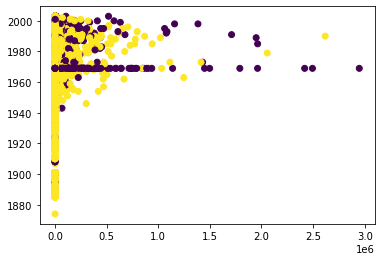

In [184]:
X = data.iloc[:,:-1].values
plt.scatter(X[:, 0], X[:, 1], c=y)

In [186]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[1. 0. 1. ... 1. 1. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Text(0.5, 1.0, 'Residual Plot')

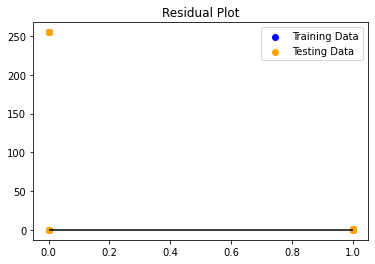

In [188]:
plt.scatter(lg_model.predict(X_train), lg_model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(lg_model.predict(X_test), lg_model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")